In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
#print([id2word.get(i, " ") for i in X_train[7]]);

Using TensorFlow backend.


In [11]:
import keras
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3   # word index offset

train,test = keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)
train_x,train_y = train
test_x,test_y = test

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in train_x[0] ))

<START> this film was just brilliant casting <UNK> <UNK> story direction <UNK> really <UNK> the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same <UNK> <UNK> as myself so i loved the fact there was a real <UNK> with this film the <UNK> <UNK> throughout the film were great it was just brilliant so much that i <UNK> the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the <UNK> <UNK> was amazing really <UNK> at the end it was so sad and you know what they say if you <UNK> at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of <UNK> and paul they were just brilliant children are often left out of the <UNK> <UNK> i think because the stars that play them all <UNK> up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they have done don't yo

In [12]:
id2word = {i: word for word, i in word2id.items()}
a=""
for j in range(10000):
    if (y_train[j]==0):
        a = a + str(([id2word.get(i, " ") for i in X_train[j]]))
        b=a.replace("u", "")
        c=b.replace("'","") 
#print c

Classes: 
[0 1]
Number of words: 
4998
Review length: 
Mean 234.76 words (172.911495)


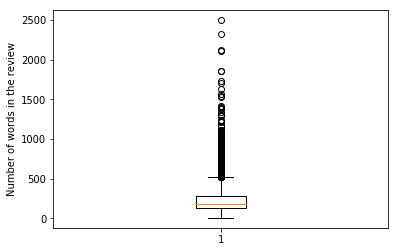

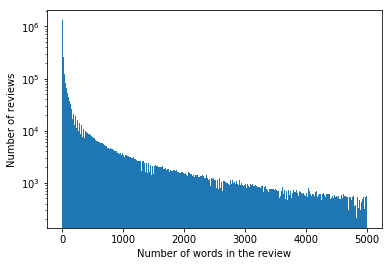

In [20]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
plt.boxplot(result)
plt.ylabel("Number of words in the review")
plt.show()

a=numpy.hstack(X)
plt.hist(a,range=(a.min(),a.max()),bins="auto")
plt.yscale('log', nonposy='clip')
plt.ylabel("Number of reviews")
plt.xlabel("Number of words in the review")
plt.show()

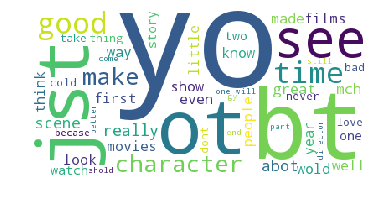

In [13]:
import matplotlib.pyplot as plt
#%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

#sentiment = 'pos'

# Combine all reviews for the desired sentiment
#combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(c))
plt.axis('off')
plt.show()